# Prevendo Salário de jogadores da NBA
### NBA é a sigla para National Basketball Association (Associação Nacional de Basquete).É a liga profissional de basquete masculino dos Estados unidos e é conhecida por ser a maior e mais importante liga de basquete do mundo.

## Dataset
#### Este dataset contem informações estatísticas de cada jogador da NBA.
#### Abaixo a descrição de cada campo:

Season Start -> Ano de inicio da temporada

Player Name -> Nome do jogador

Player Salary -> Valor do salario anual do jogador

Pos -> Posição do jogador

Age -> Idade do jogador

Tm -> Time em que o jogador atua

G -> Número de jogos disputados

GS -> Número de Jogos iniciado como titular

MP -> Total de minutos jogados  

PER (Player Efficiency Rating) -> Taxa de Eficiencia do Jogador (A medida é padronizada de acordo com a média da liga, que é de 15.)

TS% (True Shooting Percentage) -> Percentual de arremessos (considera todos os tipos de arremessos)

3PAr (3-Point Attempt Rate) -> Taxa de tentativa de arremesso de 3-pontos

FTr (Free Throw Attempt Rate) -> Taxa de lance livre

ORB%(Offensive Rebound Percentage) -> Percentual de rebotes ofensivos

DRB% (Defensive Rebound Percentage)-> Percentual de rebotes defensivos

TRB% (Total Rebound Percentage)-> Percentual total de rebotes 

AST% (Assist Percentage)-> Percentual de assistência

STL% (Steal Percentage)-> Percentual de roubos de bola

BLK% (Block Percentage)-> Percentual de bloqueios

TOV% (Turnover Percentage)-> Percentual de turnover (deperdicio de bola)

USG% (Usage Percentage)-> Percentual de jogadas em que o jogador foi utilizado

OWS (Offensive Win Shares)-> Estimativa de numero de vitórias contribuidas pelo jogador devido ao seu ataque

DWS (Defensive Win Shares)-> Estimativa de numero de vitórias contribuidas pelo jogador devido a sua defesa

WS (Win Shares)-> Estimativa de numeros de vitórias contribuidas pelo jogador

WS/48 (Win Shares Per 48 Minutes) -> Estimativa de numeros de vitórias contribuidas pelo jogador por 48 minutos (media da liga é 0,100)

OBPM (Offensive Box Plus/Minus) -> Estimativa de pontos no ataque por 100 posses que um jogador contribuiu sobre a media da liga de um jogador. Estimativa convertida para a média do time

DBPM (Defensive Box Plus/Minus) -> Estimativa de pontos na defesa por 100 posses que um jogador contribuiu sobre a media da liga de um jogador. Estimativa convertida para a média do time

BPM (Box Plus/Minus)-- Estimativa total (OBPM + DBPM)

VORP (Value over Replacement Player)-> Estimativa de pontos por 100 posses do time que um jogador contribuiu sobre um jogador de nivel reserva a media da liga de um jogador.Estimativa convertida para a media do time e proporcional a 82 jogos



## Objetivo
### Nosso objetivo é prever o salário de um jogador da NBA e gostariamos também de responder as seguintes questões:
#### 1- Qual é a distribuição dos salários por posição?
#### 2- Qual é a media salarial por posição?
#### 3- Quais são os 5 times que possuem as maiores despesas com salário?

## 1- Importação das Bibliotecas.

In [1]:
# Manipulação de dados e arquivos
import pandas as pd 
import numpy as np
# Visualização 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [114]:
# Estatistica 
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats as stats

In [5]:
# Pacote Regressão linear do SKlearn
from sklearn.linear_model import LinearRegression
# avaliação dos modelos
from sklearn.metrics import mean_squared_error, make_scorer
# Normalizaçao de dados
from sklearn.preprocessing import StandardScaler
# Divisao de arquivo treino e teste
from sklearn.model_selection import train_test_split
#Cross validation
from sklearn.model_selection import cross_val_score
#Ridge e Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

## 2- Exploração de Dados

In [6]:
#Importação o arquivo
df_salario = pd.read_excel('/media/sf_FormacaoCientistaDeDados/Portfolio/Stats_salary/NBA_Players.xlsx',encoding='latin-1')

In [7]:
#resumo das informaçoes sobre o dataset
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 54 columns):
#                     24624 non-null float64
Season Start          24624 non-null float64
Player Name           24624 non-null object
Player Salary in $    10978 non-null object
Pos                   24624 non-null object
Age                   24616 non-null float64
Tm                    24624 non-null object
G                     24624 non-null float64
GS                    18233 non-null float64
MP                    24138 non-null float64
PER                   24101 non-null float64
TS%                   24538 non-null float64
3PAr                  18839 non-null float64
FTr                   24525 non-null float64
ORB%                  20792 non-null float64
DRB%                  20792 non-null float64
TRB%                  21571 non-null float64
AST%                  22555 non-null float64
STL%                  20792 non-null float64
BLK%                  20792 non-null flo

### De acordo com a informação acima, vamos retirar as colunas "blanl" e "blank2" , alterar a coluna referente ao salário para float e renomear algumas variáveis.

In [8]:
# Remove as colunas
df_salario.drop(["#",'blanl','blank2'],axis= 1 ,inplace=True)
# Alteração das colunas 
df_salario.rename(columns={'Season Start': 'Start','Player Name':'Player','Player Salary in $':'Salary'},inplace=True)

In [9]:
# vamos cosiderar os dados a partir da temporada 2012
df_salario = df_salario[df_salario['Start']>=2012]

In [10]:
#resumo das informaçoes sobre o dataset
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3559 entries, 24 to 24607
Data columns (total 51 columns):
Start     3559 non-null float64
Player    3559 non-null object
Salary    2757 non-null object
Pos       3559 non-null object
Age       3559 non-null float64
Tm        3559 non-null object
G         3559 non-null float64
GS        3559 non-null float64
MP        3559 non-null float64
PER       3558 non-null float64
TS%       3541 non-null float64
3PAr      3541 non-null float64
FTr       3541 non-null float64
ORB%      3558 non-null float64
DRB%      3558 non-null float64
TRB%      3558 non-null float64
AST%      3558 non-null float64
STL%      3558 non-null float64
BLK%      3558 non-null float64
TOV%      3545 non-null float64
USG%      3558 non-null float64
OWS       3559 non-null float64
DWS       3559 non-null float64
WS        3559 non-null float64
WS/48     3558 non-null float64
OBPM      3559 non-null float64
DBPM      3559 non-null float64
BPM       3559 non-null float64

In [11]:
#removendo registros sem salario
df_salario  = df_salario[df_salario['Salary'].notnull()]
df_salario = df_salario[df_salario['FTr'].notnull()]
df_salario = df_salario[df_salario['FT%'].notnull()]
df_salario = df_salario[df_salario['2P%'].notnull()]

In [12]:
# Convertendo coluna para float
df_salario['Salary'] = df_salario['Salary'].astype('float')

In [13]:
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2695 entries, 24 to 24607
Data columns (total 51 columns):
Start     2695 non-null float64
Player    2695 non-null object
Salary    2695 non-null float64
Pos       2695 non-null object
Age       2695 non-null float64
Tm        2695 non-null object
G         2695 non-null float64
GS        2695 non-null float64
MP        2695 non-null float64
PER       2695 non-null float64
TS%       2695 non-null float64
3PAr      2695 non-null float64
FTr       2695 non-null float64
ORB%      2695 non-null float64
DRB%      2695 non-null float64
TRB%      2695 non-null float64
AST%      2695 non-null float64
STL%      2695 non-null float64
BLK%      2695 non-null float64
TOV%      2695 non-null float64
USG%      2695 non-null float64
OWS       2695 non-null float64
DWS       2695 non-null float64
WS        2695 non-null float64
WS/48     2695 non-null float64
OBPM      2695 non-null float64
DBPM      2695 non-null float64
BPM       2695 non-null float6

### Há uma quantidade considerável de valor nulo no campo "3PA". Isso quer dizer que esses jogadores não realizaram um arremesso de 3 pontos. Nesse caso vamos atribuir o valor 0.

In [14]:
df_salario.loc[df_salario['3PA']==0, ['3P%']] = 0

In [15]:
#Visualiza as primeiras linhas do arquivo
df_salario.describe()

,Start,Salary,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,2695.000000,2.695000e+03,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,...,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.00000
mean,2014.651948,5.594846e+06,26.419666,53.089054,26.252319,1254.210761,13.604787,0.525540,0.270625,0.275310,...,0.734945,55.821150,167.150649,222.971800,115.052319,40.102783,25.284601,71.802226,103.622635,527.76141
std,1.657756,5.773626e+06,4.150489,22.765228,28.123273,803.596261,4.715160,0.062998,0.208854,0.156181,...,0.137130,59.292882,137.141032,188.993994,126.822479,32.532575,31.159936,58.916061,63.447888,436.49025
min,2012.000000,8.819000e+03,19.000000,1.000000,0.000000,6.000000,-7.500000,0.113000,0.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,2013.000000,1.448490e+06,23.000000,35.000000,1.000000,555.500000,10.600000,0.494000,0.043000,0.173500,...,0.667000,15.000000,63.000000,81.500000,30.000000,15.000000,5.000000,27.000000,51.000000,178.00000
50%,2015.000000,3.294994e+06,26.000000,59.000000,14.000000,1194.000000,13.400000,0.531000,0.276000,0.246000,...,0.761000,35.000000,140.000000,176.000000,74.000000,33.000000,15.000000,58.000000,101.000000,432.00000
75%,2016.000000,7.775266e+06,29.000000,73.000000,51.000000,1924.000000,16.300000,0.563000,0.426500,0.340000,...,0.825000,74.500000,229.000000,306.000000,151.000000,57.000000,33.000000,102.000000,148.000000,775.50000
max,2017.000000,3.468255e+07,40.000000,83.000000,82.000000,3167.000000,34.900000,0.820000,0.943000,2.000000,...,1.000000,440.000000,829.000000,1226.000000,906.000000,191.000000,269.000000,464.000000,301.000000,2593.00000


### Verificando número de registros distintos

In [16]:
df_salario.nunique()

Start        6
Player     703
Salary    1332
Pos         13
Age         22
Tm          34
G           83
GS          83
MP        1743
PER        270
TS%        338
3PAr       674
FTr        589
ORB%       177
DRB%       288
TRB%       218
AST%       403
STL%        50
BLK%        90
TOV%       257
USG%       264
OWS        130
DWS         62
WS         152
WS/48      346
OBPM       182
DBPM       117
BPM        206
VORP        89
FG         597
FGA       1042
FG%        365
3P         214
3PA        463
3P%        313
2P         520
2PA        852
2P%        355
eFG%       349
FT         376
FTA        448
FT%        476
ORB        260
DRB        512
TRB        647
AST        465
STL        161
BLK        158
TOV        270
PF         269
PTS       1150
dtype: int64

### Este dataset está exibindo os dados por jogador, ano e time que atuou.
### Vamos agrupar os registros por jogador e ano. 
### Primeiro, vamos identificar se há registros de jogadores em mais de uma Posição ("Pos")

In [17]:
#selecionando jogadores com mais de um registro
df_salario[['Player','Start','Pos']].drop_duplicates().groupby(['Player','Start','Pos']).size().to_frame('qtd').reset_index().query('qtd> 1')
#transform('count')


,Player,Start,Pos,qtd


In [18]:
df_salario.groupby(['Player','Start','Pos'])['Tm'].size().reset_index().query('Tm > 1').head()

,Player,Start,Pos,Tm
3,Aaron Brooks,2013.0,PG,2
12,Aaron Gray,2014.0,C,3
14,Adreian Payne,2015.0,PF,3
66,Alonzo Gee,2015.0,SF,3
78,Anderson Varejao,2016.0,C,3


### Selecionando jogadores em que atuaram por mais de um time em um mesmo ano

In [19]:
#Verificando jogador
df_salario[df_salario['Player']=='Anderson Varejao']
#[['Start','Player','Salary','Tm','G','MP']]

,Start,Player,Salary,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
705,2012.0,Anderson Varejao,8368182.0,C,29.0,CLE,25.0,25.0,785.0,18.9,...,0.672,109.0,178.0,287.0,43.0,35.0,17.0,45.0,62.0,271.0
706,2013.0,Anderson Varejao,9036364.0,C,30.0,CLE,25.0,25.0,901.0,21.7,...,0.755,138.0,223.0,361.0,84.0,37.0,14.0,44.0,68.0,353.0
707,2014.0,Anderson Varejao,9704595.0,C,31.0,CLE,65.0,29.0,1800.0,17.0,...,0.681,187.0,442.0,629.0,140.0,69.0,39.0,72.0,164.0,546.0
708,2015.0,Anderson Varejao,9638554.0,C,32.0,CLE,26.0,26.0,636.0,17.7,...,0.733,57.0,113.0,170.0,35.0,19.0,16.0,35.0,58.0,255.0
709,2016.0,Anderson Varejao,1984005.0,C,33.0,TOT,53.0,0.0,496.0,11.1,...,0.640,37.0,104.0,141.0,35.0,16.0,10.0,22.0,70.0,138.0
710,2016.0,Anderson Varejao,1984005.0,C,33.0,CLE,31.0,0.0,310.0,11.2,...,0.762,24.0,67.0,91.0,20.0,11.0,5.0,16.0,35.0,80.0
711,2016.0,Anderson Varejao,1984005.0,C,33.0,GSW,22.0,0.0,186.0,11.0,...,0.552,13.0,37.0,50.0,15.0,5.0,5.0,6.0,35.0,58.0
712,2017.0,Anderson Varejao,1913345.0,C,34.0,GSW,14.0,1.0,92.0,9.4,...,0.727,12.0,15.0,27.0,10.0,3.0,3.0,8.0,16.0,18.0


## Agrupando os jogadores por ano e e posição através da variavel "G" (número de jogos)

In [20]:
df_salario_group = df_salario.groupby(['Player','Start','Pos'])['G'].max().reset_index()

In [21]:
# Realizando o cruzamento dos dataframes df_salario e df_salario_group
df_salario= df_salario.merge(df_salario_group[['Player','Start','G']],left_on=['Player','Start','G']
                                          ,right_on=['Player','Start','G'],how='inner')

In [22]:
#Verificando jogador
df_salario[df_salario['Player']=='Anderson Varejao']

,Start,Player,Salary,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
74,2012.0,Anderson Varejao,8368182.0,C,29.0,CLE,25.0,25.0,785.0,18.9,...,0.672,109.0,178.0,287.0,43.0,35.0,17.0,45.0,62.0,271.0
75,2013.0,Anderson Varejao,9036364.0,C,30.0,CLE,25.0,25.0,901.0,21.7,...,0.755,138.0,223.0,361.0,84.0,37.0,14.0,44.0,68.0,353.0
76,2014.0,Anderson Varejao,9704595.0,C,31.0,CLE,65.0,29.0,1800.0,17.0,...,0.681,187.0,442.0,629.0,140.0,69.0,39.0,72.0,164.0,546.0
77,2015.0,Anderson Varejao,9638554.0,C,32.0,CLE,26.0,26.0,636.0,17.7,...,0.733,57.0,113.0,170.0,35.0,19.0,16.0,35.0,58.0,255.0
78,2016.0,Anderson Varejao,1984005.0,C,33.0,TOT,53.0,0.0,496.0,11.1,...,0.640,37.0,104.0,141.0,35.0,16.0,10.0,22.0,70.0,138.0
79,2017.0,Anderson Varejao,1913345.0,C,34.0,GSW,14.0,1.0,92.0,9.4,...,0.727,12.0,15.0,27.0,10.0,3.0,3.0,8.0,16.0,18.0


## Salvando arquivo

In [23]:
df_salario.to_csv('nba_salario.csv')

## Outliers
### Vamos utlizar a tecnica IQR range, no qual mede a dispersão dos dados.

In [24]:
df_Q1 = df_salario.loc[df_salario.columns !='Salary'].quantile(0.25)
df_Q3 = df_salario.loc[df_salario.columns !='Salary'].quantile(0.75)
IQR = df_Q3 - df_Q1

In [25]:
# Seleciona as variaveis numericas
df_salario_num = df_salario.select_dtypes(include = ['float64'])

In [26]:
# criando 2 arquivos para separar os outliers
df_salario_sem_out = df_salario[~((df_salario_num < (df_Q1 - (1.5 * IQR)))| (df_salario_num > (df_Q3 + (1.5 * IQR)))).any(axis = 1) ].copy()
df_salario_outlier = df_salario[((df_salario_num < (df_Q1 - (1.5 * IQR)))| (df_salario_num > (df_Q3 + (1.5 * IQR)))).any(axis = 1) ].copy()


In [27]:
df_salario_sem_out.shape,df_salario_outlier.shape

((917, 51), (1360, 51))

#### De acordo com a quantidade de dados em cada arquivo, talvez a melhor abordagem para o tratamento dos outliers, 
#### seria criar um modelo para cada um dos aquivos.

### Distribuição dos dados

Skew: 1.56301835196
Kurtosis : 2.1298947894


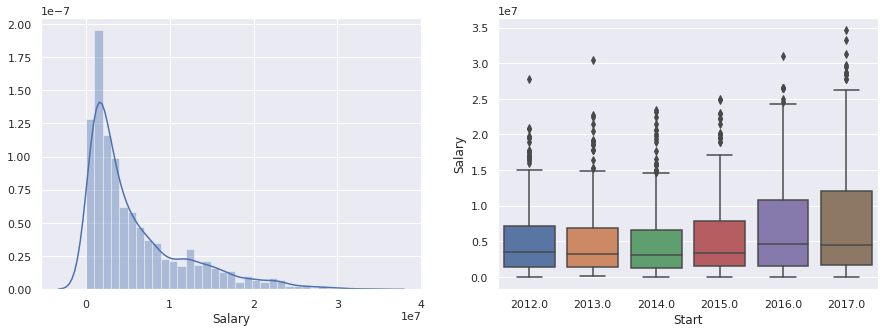

In [28]:
print('Skew:' ,df_salario['Salary'].skew())
print('Kurtosis :',df_salario['Salary'].kurt())

sns.set()
fig,axes=plt.subplots(1,2, figsize=(15,5))
# Plot de Distribuição
sns.distplot(df_salario['Salary'],ax =axes[0]);
# Boxplot
sns.boxplot(df_salario['Start'],df_salario['Salary'],ax =axes[1]);


### No gráfico de distribuição acima, vimos que há uma distorção com skew positivo.
### Observando o grafico acima, percebe-se que há uma tendencia de aumento dos salários para faixa acima do 3 quartil (75% range).
### O aumento nas faixas menores (1 e 2 quartil) não está sendo realizado na mesma proporção, levando a uma maior variação entre os salarios ao longo dos anos.

## Respondendo as Questões 
### 1- Qual é a distribuição dos salarios por posição?

### Primeiro vamos padronizar as posições dos jogadores, afim de facilitar nossas análises
### No Basquete as 5 posiçoes básicas são:
SG = Ala-Armador
<br>PF = Ala-Pivô
<br>PG = Armador
<br>SF = Ala
<br>C = Pivô

In [29]:
# Padronizando as posições
df_salario.loc[df_salario['Pos']=='SG-PG','Pos']='SG'
df_salario.loc[df_salario['Pos']=='PF-C','Pos']='PF'
df_salario.loc[df_salario['Pos']=='PG-SG','Pos']='PG'
df_salario.loc[df_salario['Pos']=='SF-PF','Pos']='SF'
df_salario.loc[df_salario['Pos']=='SG-PG','Pos']='SG'
df_salario.loc[df_salario['Pos']=='SF-SG','Pos']='SF'
df_salario.loc[df_salario['Pos']=='C-PF','Pos']='C'
df_salario.loc[df_salario['Pos']=='PF-SF','Pos']='PF'
df_salario.loc[df_salario['Pos']=='SG-SF','Pos']='SG'

In [98]:
#agrupando por "Pos"
df_group_pos = df_salario.groupby('Pos')
#gera arquivo com os dados agupados po 'Pos'
dados = df_group_pos['Salary'].mean().reset_index().sort_values('Salary',ascending=False)
# cria clouna com % de Salario
dados['% Sal_Pos'] = round(dados['Salary']/dados['Salary'].sum(),3)*100


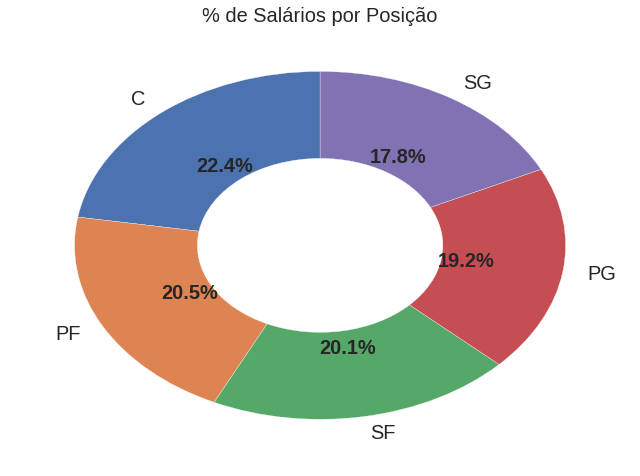

In [31]:
#gera o gráfico
#define tamanho do plot
fig,axes=plt.subplots(figsize=(11,8))
#gera o grafico de barras
plt.style.use('seaborn')
ax,texto,autotexto = axes.pie(dados['% Sal_Pos'],wedgeprops=dict(width=0.5),autopct='%1.1f%%',startangle=90,labels= dados['Pos']);
axes.set_title('% de Salários por Posição',fontsize=20)
plt.setp(autotexto, size=20, weight="bold");
for t in texto:
    t.set_size('20');

plt.show();


### Em geral, não hã grandes diferenças entre os salários por posição. 

## 2- Qual é a média de salários por posição?

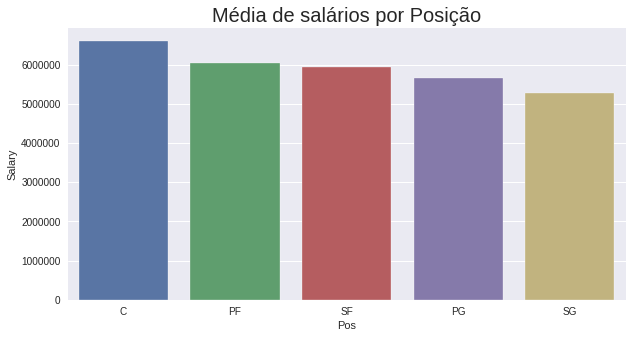

In [32]:
#gera os dados
dados = df_group_pos['Salary'].mean().reset_index().sort_values('Salary',ascending=False)
#define tamanho do plot
fig,axes=plt.subplots(figsize=(10,5))
#gera o grafico de barras
bar= sns.barplot(x='Pos',y='Salary',data=dados,ax=axes);
bar.set_title('Média de salários por Posição',fontsize=20);

### A média dos salarios de "PF","SF" e "PG" são praticamente iguais. Há uma diferença maior entre "SG" e "C".

## Testes de hipoteses
### Vamos criar um teste de hipótese para nos dizer se a media salarial de um pivo da NBA é diferente da media salarial de um jogador da liga.<br> Iremos utilizar o "One sample T-test", esse teste é usado para verificar se hã diferença entre um grupo de amostragem e a população.  

#### Hipótese nula = Não há diferença entre as médias
#### Hipótese alternativa = Há diferença entre as médias

In [145]:
#gera as medias salariais
media_sal_geral = round(df_salario['Salary'].mean(),3)
media_sal_pivo = round(df_salario[df_salario['Pos']=='C']['Salary'].mean(),3)
media_sal_pivo,media_sal_geral

(2289.013, 2147.374)

In [ ]:
#Verificando se a media de salãrio de um Pivo da NBA é realmente estatisticamente maior que a media geral dos jogadores
stats.ttest_1samp(a=df_salario[df_salario['Pos']=='C']['Salary'],popmean=media_sal_geral)


#### O valor do p-value é cerca de 1,11%. Isso significa que com 95% de confiança, nós podemos rejeitar a hipótese nula e afirmar que há sim, diferença entre as médias salariais

## 3- Quais são os 5 times que possuem as maiores despesas com salário?

In [33]:
# agrupando salario por "TM" e "Start"
df_group_times = df_salario.groupby(['Tm','Start'])
#gera arquivo com os dados agupados po 'Pos'
dados_times = df_group_times['Salary'].sum().reset_index().sort_values('Salary',ascending=False)
# Excluindo os jogadores que atuaram por mais de um time em um mesmo ano
dados_times = dados_times[dados_times['Tm']!='TOT']

In [34]:
# Criando coluna rank para agrupar top 5 de cada ano
dados_times = dados_times.assign(rnk=dados_times.groupby(['Start'])['Salary'].rank(ascending=False,method='first'))

In [68]:
# Selecionado top 5 de cada ano
dados_times = dados_times[dados_times['rnk'] <=5].sort_values(['Start','rnk'])

In [69]:
# Visualizando o DF criado
dados_times

,Tm,Start,Salary,rnk
83,MEM,2012.0,92634315.0,1.0
126,ORL,2012.0,76691337.0,2.0
89,MIA,2012.0,76664417.0,3.0
20,CHI,2012.0,72625741.0,4.0
0,ATL,2012.0,71522303.0,5.0
78,LAL,2013.0,97651581.0,1.0
12,BRK,2013.0,92894920.0,2.0
54,GSW,2013.0,82584774.0,3.0
90,MIA,2013.0,81659064.0,4.0
121,OKC,2013.0,75309185.0,5.0


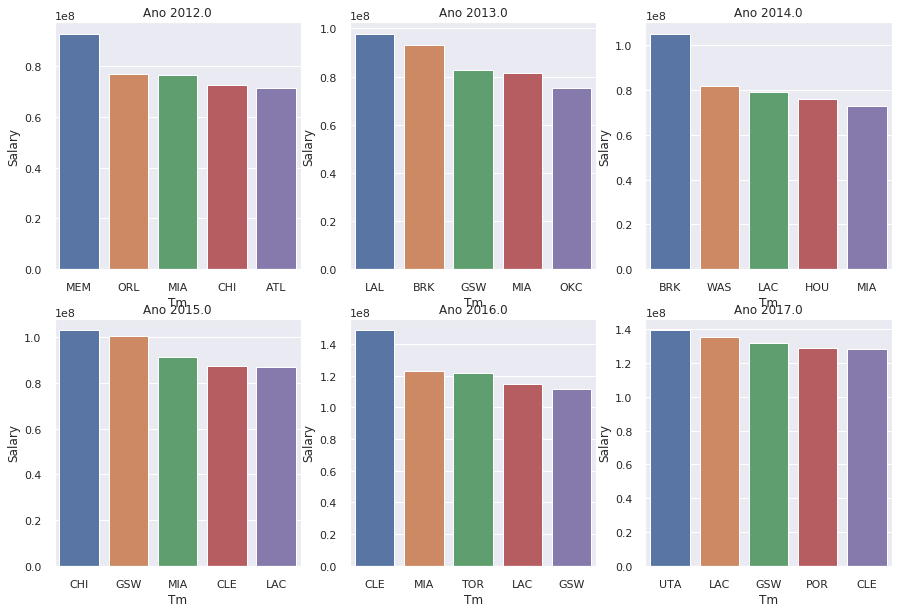

In [70]:
#define tamanho do plot
fig,axes=plt.subplots(2,3,figsize=(15,10))
linha=0
coluna=0
#gera o grafico de barras

for ano in dados_times['Start'].unique():

    bar= sns.barplot(x='Tm',y='Salary',data=dados_times[dados_times['Start']==ano],ax=axes[linha,coluna]);
    bar.set_title('Ano {}'.format(ano));
    if coluna == 2:
        linha=linha+1
        coluna=0
    else:
        coluna=coluna+1


# Transformação
### Vamos aplicar a técnica de transformar a variável Target, ou seja a variável que queremos prever, em uma distribuição normal.
### Abaixo iremos converter a variável Salary para a sua raiz quadrada.


Skew: -0.767007520319
Kurtosis : 1.57007732472


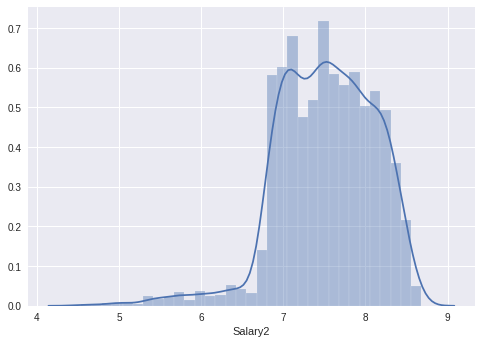

In [54]:
df_salario['Salary']=np.sqrt(df_salario['Salary'])
#sns.set()
sns.distplot(df_salario['Salary']);
print('Skew:' ,df_salario['Salary'].skew())
print('Kurtosis :',df_salario['Salary'].kurt())


### o valor de Skew ficou abaixo de 1, que é um valor aceitavel. O valor ideal para uma distribuição normal é 0.

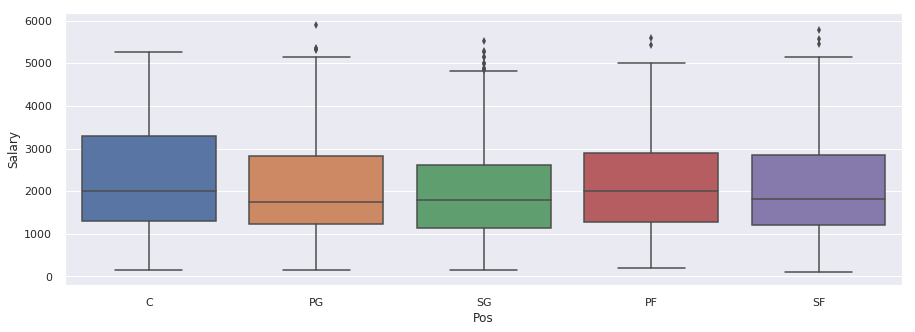

In [55]:
# Salario x Posição
sns.set()
fig, ax=plt.subplots( figsize=(15,5))
#df_salario['Salary'].hist();
sns.boxplot(df_salario['Pos'],df_salario['Salary'],ax= ax);

## Correlação

In [71]:
#Correlação
cor = df_salario.corr()

In [72]:
#Selecionando valores de correlação acima de 0.4 
variaveis = cor[abs(cor['Salary'])>0.4][['Salary']].sort_values(by='Salary',ascending=False).index
#cor[['Salary']].sort_values(by='Salary',ascending=False)['Salary'].reset_index().head(10)

In [73]:
#ordenando pelo valor da correlação "Salary"
np.abs(cor['Salary']).sort_values(ascending=False).head(15)

Salary     1.000000
Salary2    0.930831
FG         0.665893
PTS        0.664985
WS         0.645048
FGA        0.641554
2P         0.641247
2PA        0.629093
FTA        0.623305
FT         0.616322
MP         0.607154
GS         0.590576
OWS        0.587147
DRB        0.584555
VORP       0.580574
Name: Salary, dtype: float64

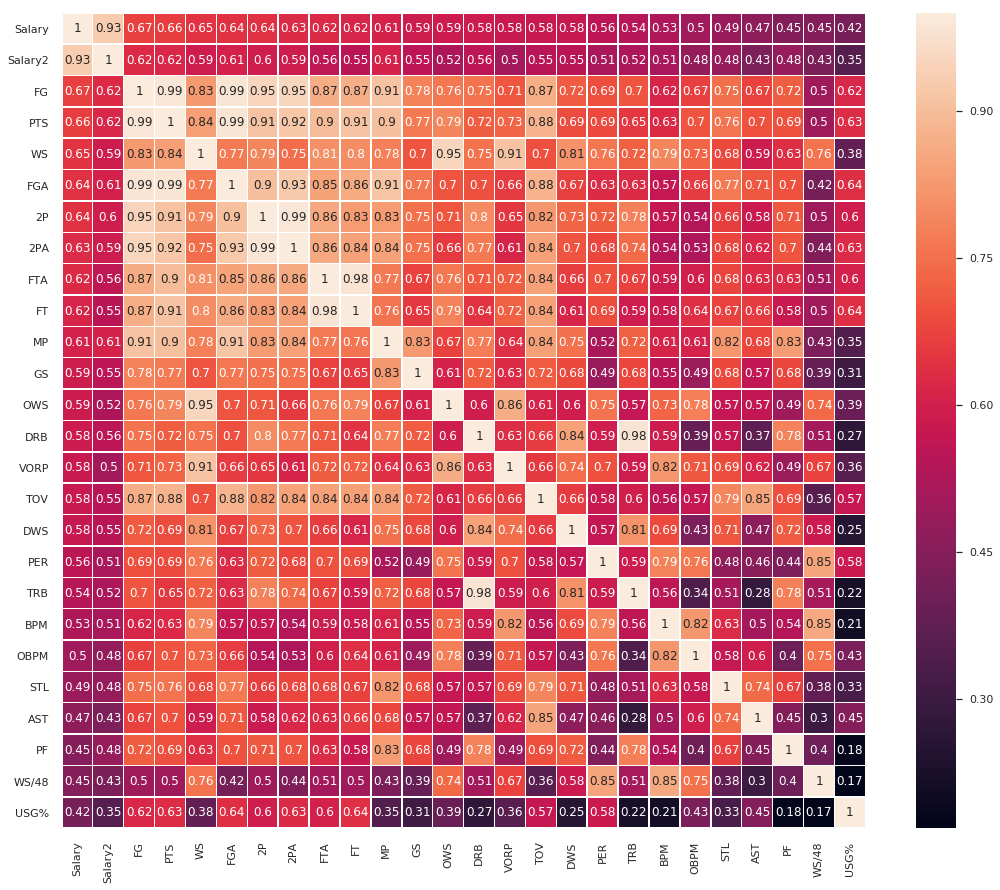

In [74]:
#Gerando Heatmap com a correlação
sns.set_style("whitegrid")
#variaveis = ['Salary','WS','VORP','OWS','MP','DWS','Age','BPM','USG%' ,'NBA_DraftNumber']
corr_variaveis = df_salario[variaveis].corr() 
plt.figure(figsize=(18,15))
sns.heatmap(corr_variaveis ,annot = True,linewidths=.5);

## Removendo variáveis devido a colinearidade
### Colinearidade ocorre em problemas de regressão onde duas variaveis preditoras tem uma correlação entre si. Quando há uma correlação é alta, uma variavel pode explicar a varição da outra. Quando essas variaveis são utilizadas no modelo, elas não podem prever a variavel target independentemente, no qual reduz a precisão dos coeficientes de cada variavel preditora. 
### A Muilticolinearidade ocorre quando há mais de duas variáveis envolvidas.
### Fonte: https://www.britannica.com/topic/collinearity-statistics
### https://en.wikipedia.org/wiki/Multicollinearity

In [75]:
#retirando variáveis
variaveis = variaveis.drop(['FG','FGA','2PA','FTA','TRB','OWS'])

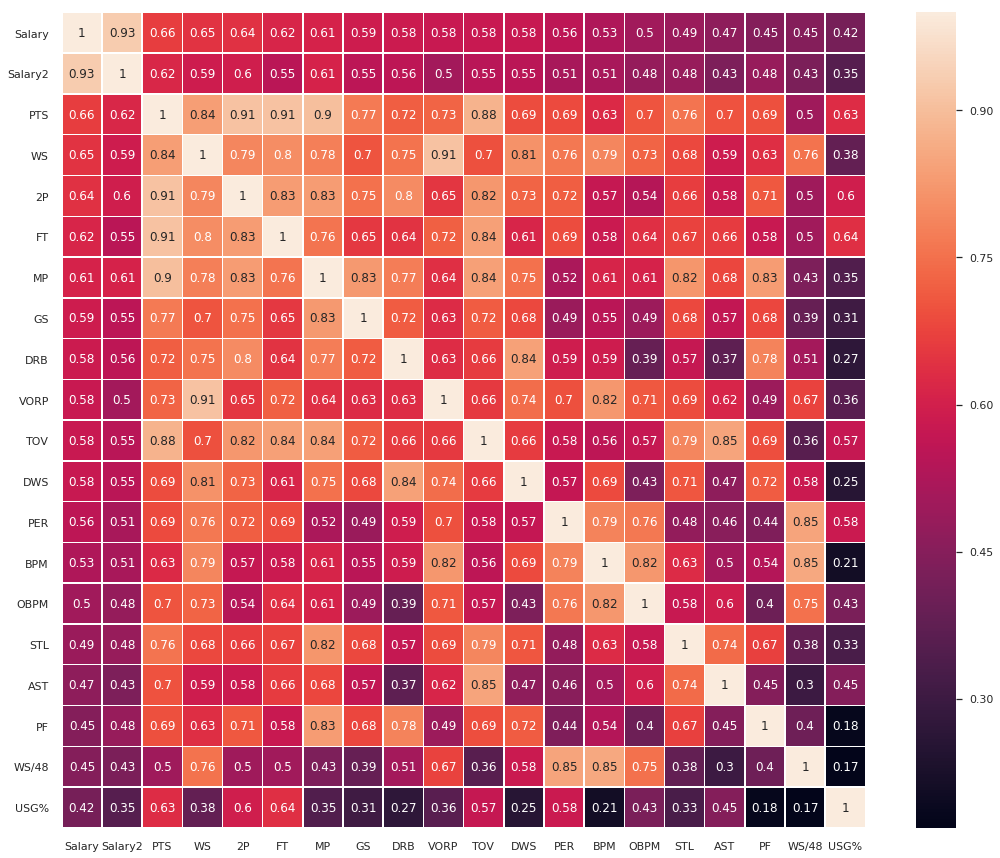

In [76]:
#Visualizando Heatmap novamente
sns.set_style("whitegrid")
corr_variaveis = df_salario[variaveis].corr() 
plt.figure(figsize=(18,15))
sns.heatmap(corr_variaveis ,annot = True,linewidths=.5);

In [77]:
#Ordenando pelo valor da correlação
np.abs(corr_variaveis['Salary']).sort_values(ascending=False).head(15)

Salary     1.000000
Salary2    0.930831
PTS        0.664985
WS         0.645048
2P         0.641247
FT         0.616322
MP         0.607154
GS         0.590576
DRB        0.584555
VORP       0.580574
TOV        0.578176
DWS        0.576777
PER        0.556471
BPM        0.528557
OBPM       0.501525
Name: Salary, dtype: float64

## Criando novas variáveis para ajudar no relacionamento não linear 

In [78]:
df_salario['PTS_2']= df_salario['PTS']**2
df_salario['PTS_SQRT']=np.sqrt(df_salario['PTS'])

df_salario['WS_2']= df_salario['WS']**3
df_salario['WS_SQRT']=np.cbrt(df_salario['WS'])

df_salario['2P_2']= df_salario['2P']**2
df_salario['2P_SQRT']=np.sqrt(df_salario['2P'])

df_salario['FT_2']= df_salario['FT']**2
df_salario['FT_SQRT']=np.sqrt(df_salario['FT'])

df_salario['MP_2']= df_salario['MP']**2
df_salario['MP_SQRT']=np.sqrt(df_salario['MP'])

df_salario['GS_2']= df_salario['GS']**2
df_salario['GS_SQRT']=np.sqrt(df_salario['GS'])

df_salario['DRB_2']= df_salario['DRB']**2
df_salario['DRB_SQRT']=np.sqrt(df_salario['DRB'])

df_salario['VORP_2']= df_salario['PTS']**3
df_salario['VORP_SQRT']=np.cbrt(df_salario['VORP'])

df_salario['TOV_2']= df_salario['TOV']**2
df_salario['TOV_SQRT']=np.sqrt(df_salario['TOV'])

df_salario['DWS_2']= df_salario['DWS']**3
df_salario['DWS_SQRT']=np.cbrt(df_salario['DWS'])

df_salario['PER_2']= df_salario['PER']**3
df_salario['PER_SQRT']=np.cbrt(df_salario['PER'])

df_salario['BPM_2']= df_salario['BPM']**3
df_salario['BPM_SQRT']=np.cbrt(df_salario['BPM'])

df_salario['OBPM_2']= df_salario['OBPM']**3
df_salario['OBPM_SQRT']=np.cbrt(df_salario['OBPM'])

df_salario['STL_2']= df_salario['STL']**2
df_salario['STL_SQRT']=np.sqrt(df_salario['STL'])



## Pairplot
### Verificação de relacionamento das variáveis independentes com a variavel "Salary"

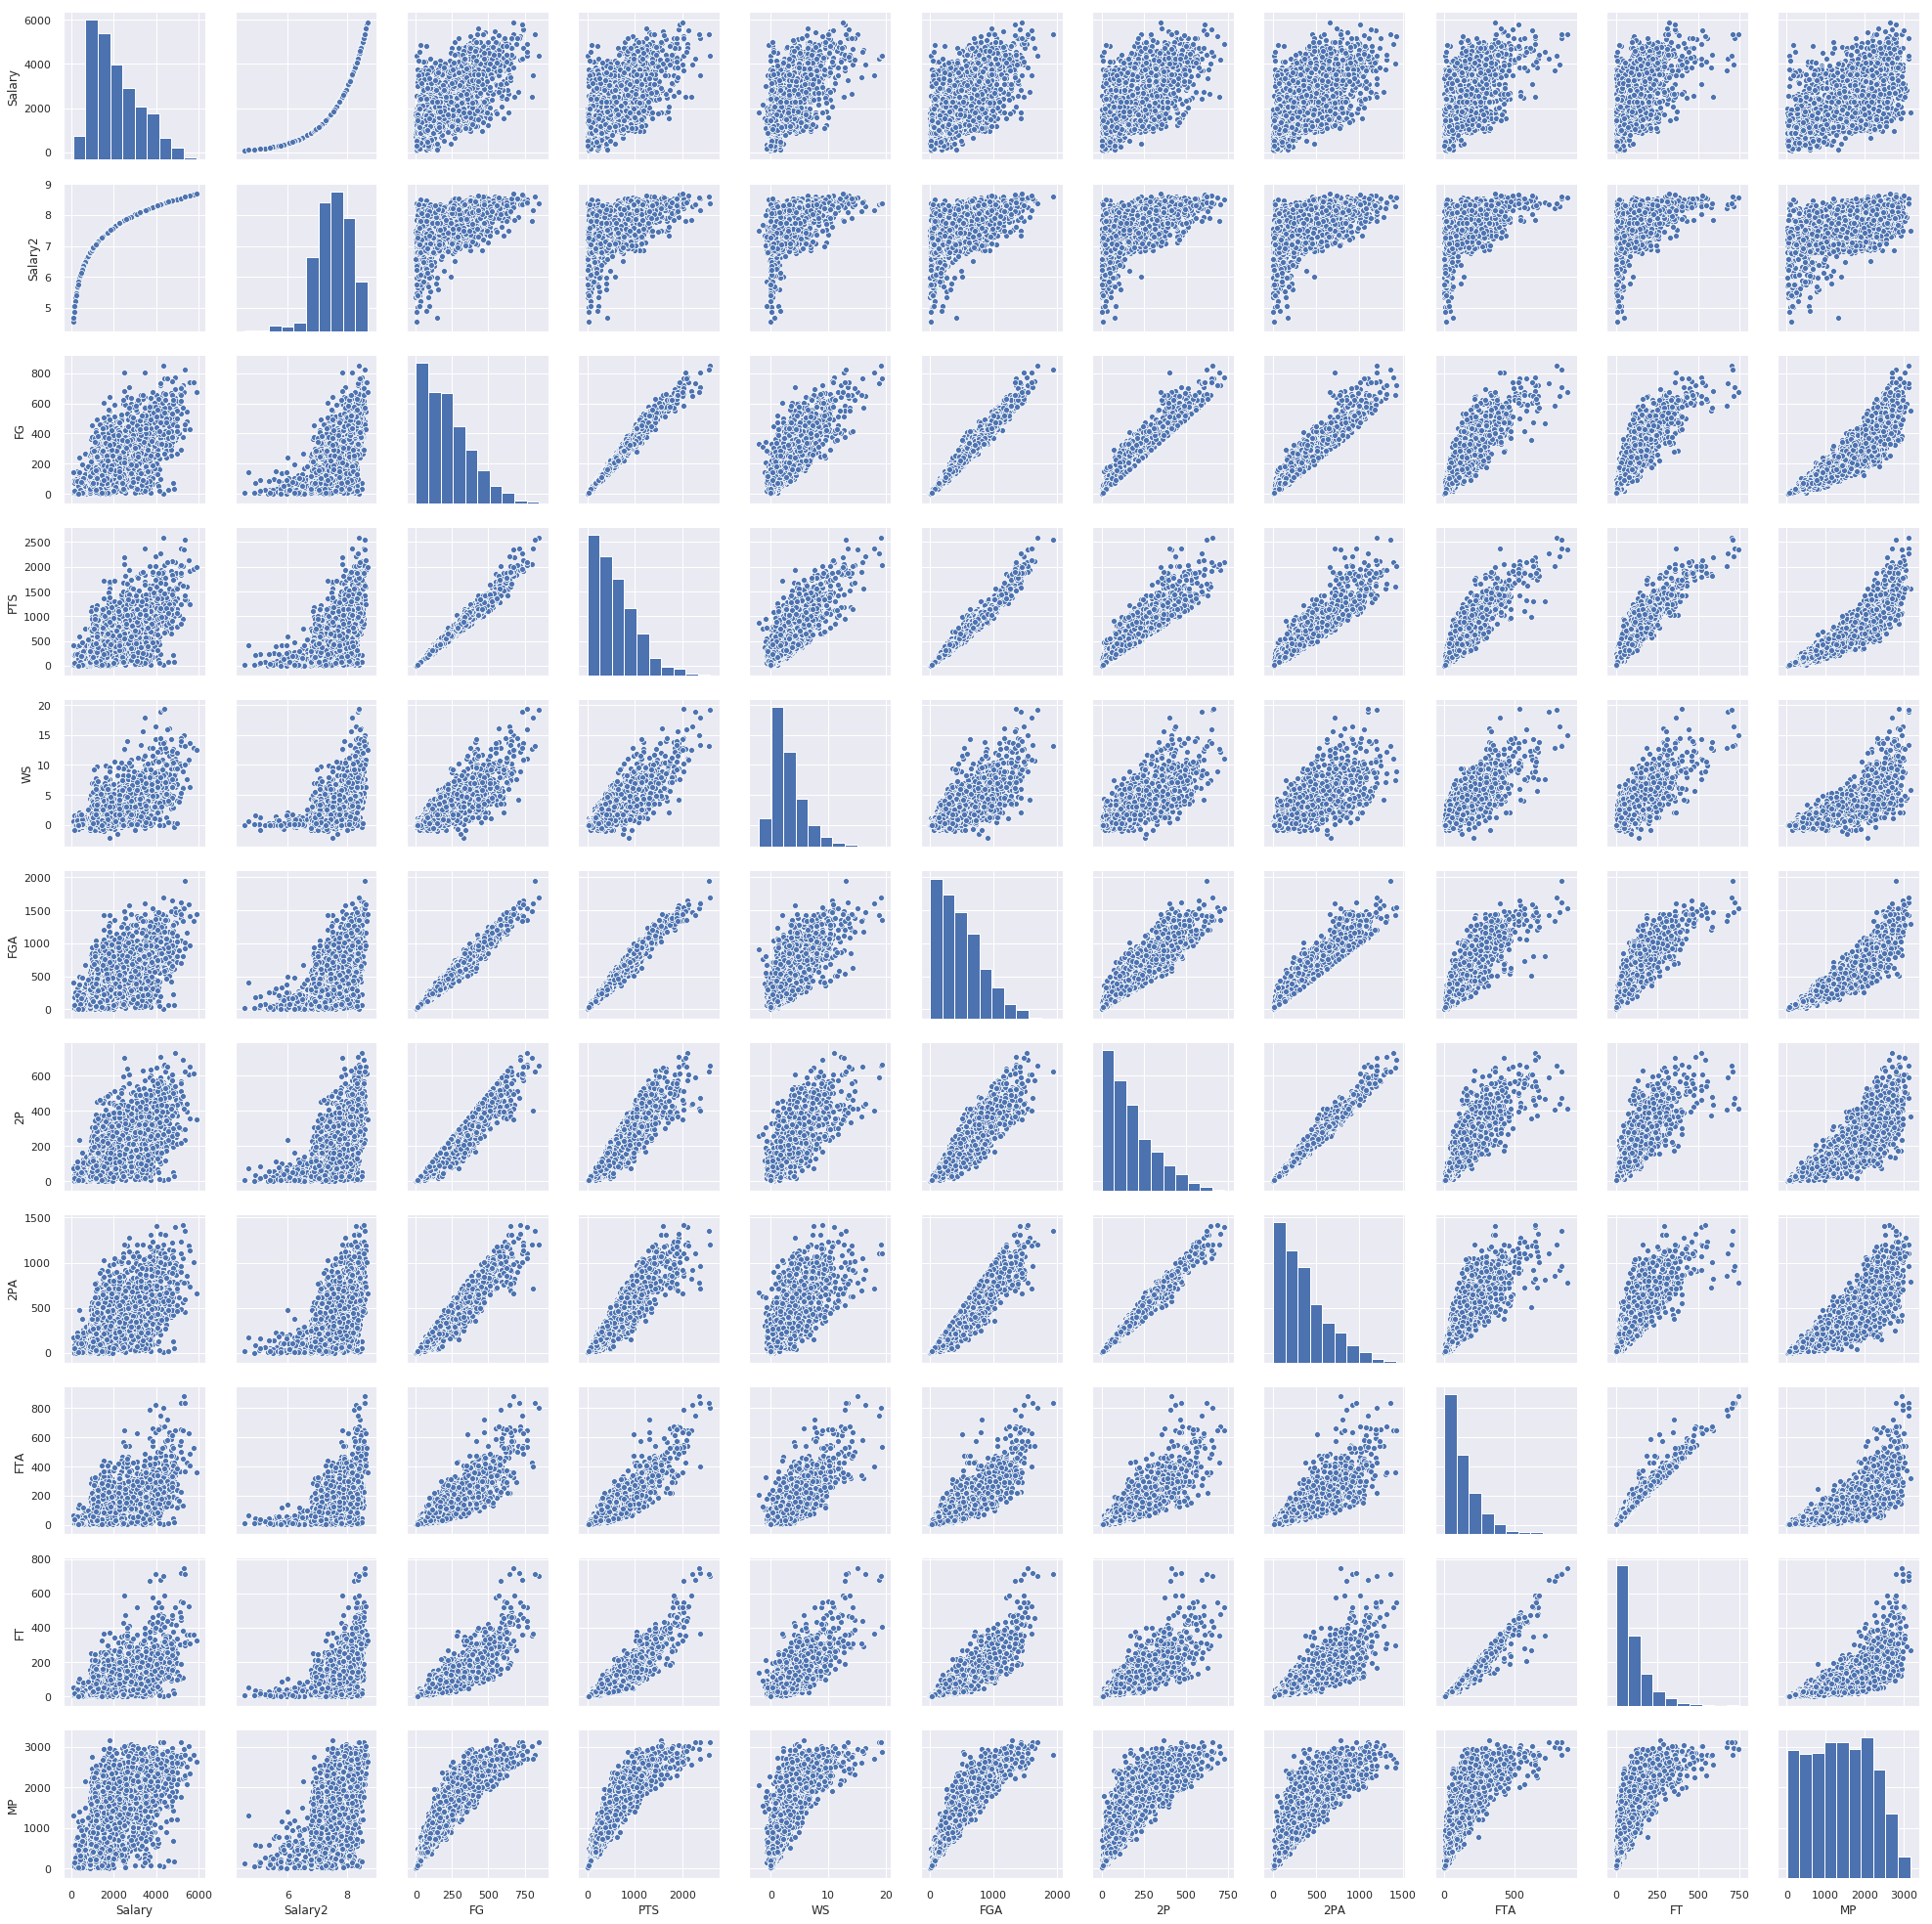

In [79]:
variaveis_corr = cor[abs(cor['Salary'])>0.60][['Salary']].sort_values(by='Salary',ascending=False).index
sns.set()
sns.pairplot(df_salario[variaveis_corr]);

## No gráfico acima, vimos que há algumas variáveis com relacionamento linear quase perfeito (ex: "Pts"-"2P")

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(10,6))
sns.set()
# Gráficos de distribuição
sns.distplot(df_salario['FG'],ax=axes[0]).set_title('FG');
sns.distplot(np.sqrt(df_salario['FG']),ax=axes[1]).set_title('Raiz quadrada FG');


## Analise Exploratória

## Dataset NBA Full stats
#### https://www.kaggle.com/whitefero/nba-players-advanced-season-stats-19782016#NBA%20Players%20-%20Basic%20Season%20Stats%20(1950-2017).xlsx
## Glossary
#### https://www.basketball-reference.com/about/glossary.html
## Source dataset
https://www.kaggle.com/meicher/201718-advanced-player-metrics-salary

## Normalidade

### Verificando skewness e kurtosis
#### Skew = mede o grau de simetria da distirbuição da variavel:
#####         < 0 - distribuição negativa ou a esquerda  
#####         0 - distrbuição normal 
#####         > 1 - distrbuição positiva ou a direita)

#### kurtosis mede o grau de achatamento da distribuição 
#####         < 0 - é mais alta referente a distrbuição normal  
#####         0 -   possui um achatamento referente a uma distribuição normal 
#####         > 1 - é mais achatada que uma distrbuição normal


In [ ]:
for campo in df_salario[variaveis]:
    print('Skew %s'  % campo, df_salario[campo].skew())
    print('Kurtosis %s ' % campo, df_salario[campo].kurt())
    

In [50]:
variaveis_p_transf = df_salario[variaveis].skew()[df_salario[variaveis].skew()> 1]

In [56]:
for col in variaveis_p_transf.index:
    df_salario[col]= np.sqrt(df_salario[col])

/home/dataanalysis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


## Preparação do dataset para criação do modelo

In [55]:
#Criação das variaveis dummies
df_salario_pos = pd.get_dummies(df_salario['Pos'],drop_first=True)

In [56]:
df_salario_pos.rename(columns={'PF':'PPF'},inplace=True)

In [82]:
#df_salario.drop(['Player','Pos'],axis=1,inplace=True)
df_modelo = df_salario.merge(df_salario_pos,left_index =True,right_index=True, how='inner')

In [83]:
df_modelo.drop(['Pos','Tm','Player'],inplace=True,axis=1)

In [59]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

## Criação do Modelo
### 1 - OLS
### Vamos criar esse primeiro modelo sem nenhum tipo de transformação e também sem criação de novas variáveis, apenas utilizando as variaveis com maior grau de correlaçao em relação ao salário


In [60]:
#variaveis.remove('Salary')
df_salario_ols = df_salario[variaveis]

#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_salario_ols.loc[:,df_salario_ols.columns !='Salary'],df_salario_ols.loc[:,'Salary'])

In [61]:
X_train.head()

,PTS,WS,2P,FT,MP,GS,DRB,VORP,TOV,DWS,PER,BPM,OBPM,STL,AST,PF,WS/48,USG%
1785,1021.0,4.3,295.0,326.0,2214.0,19.0,165.0,-0.1,148.0,1.2,16.0,-2.2,0.1,49.0,340.0,90.0,0.094,22.7
2209,1067.0,4.0,285.0,116.0,2222.0,67.0,252.0,0.4,119.0,2.3,13.6,-1.3,-0.4,78.0,176.0,155.0,0.085,21.4
34,29.0,0.2,10.0,9.0,68.0,0.0,24.0,0.1,6.0,0.2,21.1,1.5,-2.5,4.0,5.0,15.0,0.146,22.6
1368,533.0,1.3,142.0,63.0,1457.0,41.0,153.0,0.3,61.0,0.6,12.3,-1.1,0.0,52.0,150.0,129.0,0.043,19.2
757,1350.0,7.1,485.0,296.0,2823.0,79.0,499.0,3.2,208.0,2.9,18.8,2.4,1.0,94.0,345.0,258.0,0.121,22.3


In [43]:
#treina o modelo
X = sm.add_constant(X_train)
model= sm.OLS(y_train,X).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     90.07
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          5.54e-240
Time:                        13:35:17   Log-Likelihood:                -13828.
No. Observations:                1707   AIC:                         2.770e+04
Df Residuals:                    1687   BIC:                         2.781e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        986.2716    226.697      4.351      0.000     541.635    1430.908
PTS            0.9105      0.309      2.950      0.003       0.305       1.516
WS          -267.0674    395.763     -0.675      0.500   -1043.306     509.171
2P            -0.6054      0.523     -1.157      0.248      -1.632       0.421
FT             0.9394      0.622      1.511      0.131      -0.280       2.159
MP             0.1409      0.144      0.981      0.327      -0.141       0.423
GS             7.7510      1.283      6.040      0.000       5.234      10.268
OWS          309.5715    396.472      0.781      0.435    -468.058    1087.201
DRB            1.6889      0.436      3.870      0.000       0.833       2.545
VORP        -154.8177     65.424     -2.366      0.018    -283.138     -26.497
TOV           -4.7308      1.425     -3.321      0.001      -7.525      -1.936
DWS          453.1841    397.695      1.140      0.255    -326.843    1233.211
PER           10.7827     22.011      0.490      0.624     -32.389      53.954
BPM          113.9577     25.772      4.422      0.000      63.410     164.505
OBPM         -38.9820     27.643     -1.410      0.159     -93.201      15.237
STL           -6.0272      1.482     -4.067      0.000      -8.934      -3.120
AST            1.6336      0.418      3.908      0.000       0.814       2.453
PF            -3.6850      0.718     -5.134      0.000      -5.093      -2.277
WS/48      -1550.5805   1516.668     -1.022      0.307   -4525.329    1424.168
USG%          32.4884     13.343      2.435      0.015       6.319      58.658
==============================================================================
Omnibus:                       60.863   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.595
Skew:                           0.451   Prob(JB):                     2.10e-15
Kurtosis:                       3.372   Cond. No.                     1.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analisando o modelo gerado, temos variáveis que possuem um p-value (P>|t|) muito baixo, indicando<br>que é improvavel que a associação da variável independente e "Salary" seja por acaso.

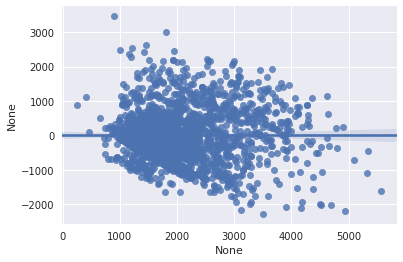

In [45]:
sns.regplot(x= model.fittedvalues,y=model.resid)

## Na regressão linear, os residuos não devem ter correlação com os valores previstos. Nesse caso uma alternativa para este problema seria transformar a variavel dependente, ou seja a coluna "salary" com a raiz quadrada ou o log 


## Cross Validation

In [63]:
modelo_reg = LinearRegression()
score = cross_val_score(modelo_reg,df_salario_ols.loc[:,df_salario_ols.columns !='Salary'],df_salario_ols.loc[:,'Salary'],cv= 5)

In [64]:
score.mean()

0.50328062192965217

## Ridge e Lasso

In [66]:
df_modelo.shape

(2277, 78)

In [67]:
# Seleciona as variaveis numéricas
df_salario_num = df_salario.select_dtypes(include = ['float64']).columns
df_salario_num= df_salario_num.drop('Salary')

In [84]:
#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_modelo.loc[:,df_modelo.columns !='Salary'],df_modelo.loc[:,'Salary'])

In [85]:
X_train.loc[:,df_salario_num].head()

,Start,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,MP_2,MP_SQRT,GS_2,GS_SQRT,DRB_2,DRB_SQRT,VORP_2,VORP_SQRT,TOV_2,TOV_SQRT
200,2015.0,22.0,64.0,21.0,1243.0,15.2,0.578,0.000,0.941,13.7,...,1545049.0,35.256205,441.0,4.582576,61504.0,15.748016,2.809446e+07,0.793701,2704.0,7.211103
633,2012.0,24.0,45.0,1.0,559.0,8.1,0.405,0.000,0.209,7.1,...,312481.0,23.643181,1.0,1.000000,7921.0,9.433981,1.860867e+06,-0.669433,625.0,5.000000
584,2015.0,36.0,77.0,77.0,2282.0,19.2,0.560,0.258,0.272,2.1,...,5207524.0,47.770284,5929.0,8.774964,170569.0,20.322401,2.368593e+09,1.144714,6724.0,9.055385
1226,2016.0,20.0,63.0,9.0,671.0,8.2,0.507,0.374,0.232,4.1,...,450241.0,25.903668,81.0,3.000000,11664.0,10.392305,1.314426e+07,-0.887904,1156.0,5.830952
693,2013.0,25.0,73.0,54.0,2012.0,18.3,0.552,0.267,0.196,7.9,...,4048144.0,44.855323,2916.0,7.348469,133956.0,19.131126,8.902771e+08,1.238562,5625.0,8.660254


In [86]:
std = StandardScaler()
X_train.loc[:,df_salario_num] = std.fit_transform(X_train.loc[:,df_salario_num])
X_test.loc[:,df_salario_num] = std.transform(X_test.loc[:,df_salario_num])

In [87]:
reg = RidgeCV(alphas=[0.1, 1.0, 10.0,20.0], cv=10,normalize=False,fit_intercept=True).fit(X_train,y_train)       
reg.score(X_train,y_train)


0.63067119755489742

In [88]:
reg.alpha_

1.0

In [89]:
y_pred = reg.predict(X_test)
rmse(y_pred,y_test)

729.21507253902701

In [90]:
for i in range(0,len(reg.coef_)):
    print(X_train.columns[i],reg.coef_[i])

Start 255.928308845
Age 171.737089299
G -597.113239635
GS -324.170742293
MP 346.339310056
PER -111.351901762
TS% -122.936409508
3PAr -268.423797254
FTr -19.248549703
ORB% -3.57347156178
DRB% 97.5618469824
TRB% -299.330470053
AST% -195.727134636
STL% -48.940735065
BLK% 76.1724136268
TOV% 176.601784062
USG% 511.783010884
OWS 341.956154119
DWS 242.115072481
WS -28.1573588804
WS/48 216.064650427
OBPM 47.9934890883
DBPM -260.909448809
BPM 318.553327834
VORP -257.871274796
FG 249.35806982
FGA -211.712449721
FG% 57.1763301246
3P -215.659888569
3PA 250.490585458
3P% 6.71629931226
2P 365.334948664
2PA -384.863930845
2P% 14.3726964054
eFG% -134.584241854
FT -81.576165333
FTA 357.991294939
FT% -1.41015538778
ORB -8.91330822258
DRB 22.8864580633
TRB 13.6991684947
AST 185.306003013
STL -509.02710932
BLK 15.0676934195
TOV -225.729564643
PF -210.066375336
PTS 137.254509031
PTS_2 536.773320383
PTS_SQRT -678.787133415
WS_2 -108.67734974
WS_SQRT -79.778239567
2P_2 32.9080945944
2P_SQRT -489.614915677
FT

## Lasso

In [94]:
lasso = LassoCV(alphas=[0.1,0.3,0.5,1.0, 10.0,20.0,30.0,50.0], cv=10,normalize=False,fit_intercept=True).fit(X_train,y_train)       
lasso.score(X_train,y_train)


/home/dataanalysis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/dataanalysis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.62799573695743294

In [95]:
y_pred = lasso.predict(X_test)
rmse(y_pred,y_test)

726.83544015363248

In [96]:
lasso.alpha_

0.5

In [97]:
for i in range(0,len(lasso.coef_)):
    print(X_train.columns[i],lasso.coef_[i])

Start 254.922513072
Age 174.387931857
G -596.564525411
GS -187.880001415
MP -0.0
PER -59.1348646361
TS% -157.561217434
3PAr -216.155070853
FTr -2.69557391034
ORB% -60.9176196165
DRB% -0.0
TRB% -119.1695431
AST% -178.271626602
STL% -7.13528190999
BLK% 58.7307625177
TOV% 195.034126568
USG% 445.481836145
OWS 327.336425831
DWS 236.909204909
WS 0.0
WS/48 189.495757054
OBPM 230.127079304
DBPM -63.4226222586
BPM 0.0
VORP -218.47273306
FG 0.0
FGA -0.0
FG% 0.0
3P -77.1637673435
3PA 135.776854121
3P% -1.50263076071
2P 21.674122576
2PA -384.56837415
2P% 10.3050413705
eFG% -47.145753204
FT -0.0
FTA 292.818500766
FT% -0.0
ORB -1.55907074576
DRB 101.882649368
TRB 0.0
AST 163.469555597
STL -174.384891623
BLK 16.0599998219
TOV -0.0
PF -192.703339455
PTS 7.47482477292
PTS_2 377.944190101
PTS_SQRT -489.015524059
WS_2 -111.653222693
WS_SQRT -75.575580781
2P_2 163.375584873
2P_SQRT -0.0
FT_2 -51.1753875405
FT_SQRT -296.850317578
MP_2 -176.177692628
MP_SQRT 1479.50439977
GS_2 155.702976441
GS_SQRT 76.11409

## Adicionando termo de interação

In [152]:
df_salario_ols = df_salario[cols_nums].copy()
df_salario_ols['Salary'] = np.sqrt(df_salario_ols['Salary']) 
df_salario_ols['2P_X_BPM'] = df_salario_ols['2P%'] * df_salario_ols['BPM']
df_salario_ols['Start_X_BPM'] = df_salario_ols['Start'] * df_salario_ols['BPM']
#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_salario_ols.loc[:,df_salario_ols.columns !='Salary'],df_salario_ols.loc[:,'Salary'])

In [106]:
#treina o modelo
X = sm.add_constant(X_train)
model= sm.OLS(y_train,X).fit()

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     79.74
Date:                Sat, 05 Jan 2019   Prob (F-statistic):          6.16e-242
Time:                        22:28:01   Log-Likelihood:                -13816.
No. Observations:                1707   AIC:                         2.768e+04
Df Residuals:                    1684   BIC:                         2.780e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1076.6044    186.891      5.761      0.000     710.042    1443.167
PTS           -0.7589      1.182     -0.642      0.521      -3.078       1.560
FG             0.9136      0.434      2.104      0.036       0.062       1.765
WS         -1160.1981    408.044     -2.843      0.005   -1960.526    -359.871
FTA            1.3523      1.200      1.127      0.260      -1.002       3.706
2P             4.0676      2.378      1.711      0.087      -0.596       8.732
FT             0.5679      1.706      0.333      0.739      -2.779       3.915
FGA            2.6040      1.363      1.910      0.056      -0.070       5.278
2PA           -2.3095      1.394     -1.656      0.098      -5.045       0.426
VORP          59.6835     93.936      0.635      0.525    -124.559     243.926
OWS         1266.8728    408.029      3.105      0.002     466.575    2067.170
GS            15.0000      2.345      6.397      0.000      10.401      19.599
TOV            0.0548      0.942      0.058      0.954      -1.792       1.902
DRB            5.3984      1.098      4.918      0.000       3.245       7.551
MP            -0.5828      0.151     -3.853      0.000      -0.880      -0.286
PER           13.2310     12.435      1.064      0.287     -11.158      37.620
DWS         1243.5647    408.599      3.043      0.002     442.149    2044.980
TRB           -3.2906      0.782     -4.207      0.000      -4.825      -1.756
BPM           -0.9641     20.171     -0.048      0.962     -40.527      38.598
PTS_X_BPM      0.0015      0.041      0.038      0.970      -0.078       0.081
GS_X_BPM       0.6618      0.572      1.158      0.247      -0.460       1.783
GS_X_PTS      -0.0114      0.003     -4.468      0.000      -0.016      -0.006
VORP_X_WS    -15.7338      5.036     -3.124      0.002     -25.610      -5.857
BPM_X_PER      1.0206      1.406      0.726      0.468      -1.737       3.778
==============================================================================
Omnibus:                       72.540   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.124
Skew:                           0.447   Prob(JB):                     2.69e-20
Kurtosis:                       3.683   Cond. No.                     1.92e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.41e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [153]:
lasso = LassoCV(alphas=[0.01,0.05,0.1, 0.5, 1.0, 10.0,20.0], cv=10,normalize=True,fit_intercept=True).fit(X_train,y_train)       
lasso.score(X_train,y_train)


/home/dataanalysis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/dataanalysis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.59360245505579323

In [154]:
lasso.alpha_

0.01

In [155]:
for i in range(0,len(lasso.coef_)):
    print(X_train.columns[i],lasso.coef_[i])

Start 137.880937393
Age 40.2707852663
G -18.9548630878
GS 0.919831305056
MP 0.810179382262
PER -9.03170905512
TS% -2745.40111469
3PAr -947.663111578
FTr -443.349319488
ORB% -20.1457207029
DRB% 11.1700575015
TRB% -0.0
AST% -30.4298741314
STL% -230.606093722
BLK% -13.9839355645
TOV% 33.4013376802
USG% 61.3735407237
OWS 119.497329736
DWS 292.954226258
WS -0.0
WS/48 -1965.72161055
OBPM 135.217378454
DBPM -0.0
BPM 1.31136762591
VORP -345.347064265
FG 1.08482845863
FGA -0.364129522552
FG% 0.0
3P -0.691521598289
3PA 0.0724841491046
3P% -66.6584073177
2P 1.92441697893
2PA -2.03729480791
2P% 53.7530526352
eFG% -488.08561715
FT -0.594730874984
FTA 1.41876842518
FT% -186.348930224
ORB -0.0
DRB 0.568647972575
TRB 0.0
AST 1.70481248656
STL 0.961288272949
BLK 0.687867954
TOV -1.3694205701
PF -2.95293522415
PTS 0.0
2P_X_BPM 63.9866142331
Start_X_BPM 0.0487702589897


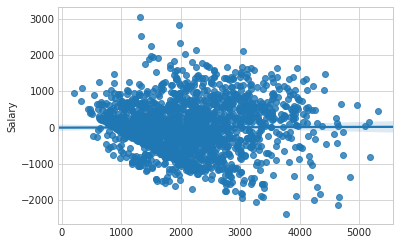

In [156]:
sns.regplot(lasso.predict(X_train) ,(y_train - lasso.predict(X_train)));

## VIF - Variance Inflation Factor

### Metodo utilizado para identificar multicolinearidade

In [55]:
cnames = X_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(X_train[yvar],sm.add_constant( X_train[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))

2P 101.783
FGA 28.16
2PA 115.324
OWS 4.276
GS 3.589
DRB 51.964
MP 11.694
DWS 4.774
TRB 48.68
BPM 2.678
